<a href="https://colab.research.google.com/github/falahamro/Deep-Learning/blob/main/Arabic_Model_Holistic_Identity_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this model we apply the holistic identity mapping appoach done on English dataset to Arabic based dataset in the context of extremists events in the region. Our goal in addtion to identiy dimsisons is to find out to what extent our model is applicable to non-westren contexts. 

**Step 1: Import important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
import re # for regular expression 
import string 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [ ]:
# change the seeting of the cells
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)

**Step 2: Read data file**

In [ ]:
# We have more then csv file. First step is to reaf them and merge them. 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/Shereen (12).csv")
#df2 = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/Shereen (14).csv")
#df3 = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/Shereen (16).csv")
#df4 = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/Shereen (18).csv")
#df5 = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/Shereen (20).csv")

In [ ]:
#frames = [df1, df2, df3, df4, df5]

In [ ]:
#df = pd.concat(frames)
#df.reset_index(drop=True, inplace=True)

Concatinating Datasets

In [ ]:
#from operator import index
#df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

In [ ]:
df.head()

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0


Explore the data

In [ ]:
# How. much data do I have
len(df)

95421

In [ ]:
df.isnull().sum()
df.dropna(how='all')

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95416,978721987647324160,138958,579,36,2030,"RT @ajmubasher: ""شيرين باقية والاحتلال إلى زوا...",2022-05-12 00:00:06+00:00,51,0,0,0
95417,4901401397,2835,2923,4,91015,RT @DhaifAlShami650: الاستهداف الصهيوني المباش...,2022-05-12 00:00:05+00:00,359,0,0,0
95418,3111009857,858,1378,0,12375,RT @motawea74: الجزيرة بالعربى : استشهاد الزم...,2022-05-12 00:00:04+00:00,227,0,0,0
95419,4714131377,568,109,0,67414,RT @Lolwah_Alkhater: جريمة نكراء تضاف إلى السج...,2022-05-12 00:00:00+00:00,536,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95421 entries, 0 to 95420
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author_id         95421 non-null  int64 
 1   author_followers  95421 non-null  int64 
 2   author_followee   95421 non-null  int64 
 3   listed_count      95421 non-null  int64 
 4   author_tweets     95421 non-null  int64 
 5   text              95421 non-null  object
 6   created_at        95421 non-null  object
 7   retweets          95421 non-null  int64 
 8   replies           95421 non-null  int64 
 9   likes             95421 non-null  int64 
 10  quote_count       95421 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 8.0+ MB


In [ ]:
df.count()

author_id           95421
author_followers    95421
author_followee     95421
listed_count        95421
author_tweets       95421
text                95421
created_at          95421
retweets            95421
replies             95421
likes               95421
quote_count         95421
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
author_id,95421.0,8.127606e+17,6.316159e+17,47613.0,2.258488e+09,1.085863e+18,1.393167e+18,1.524809e+18
author_followers,95421.0,5.929045e+03,1.594716e+05,0.0,7.500000e+01,3.060000e+02,1.100000e+03,1.880653e+07
author_followee,95421.0,1.259815e+03,3.538445e+03,0.0,1.720000e+02,4.800000e+02,1.298000e+03,3.918770e+05
listed_count,95421.0,8.764391e+00,1.521114e+02,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.820000e+04
author_tweets,95421.0,3.574685e+04,8.501286e+04,1.0,2.176000e+03,9.632000e+03,3.334600e+04,2.443089e+06
retweets,95421.0,5.270909e+02,9.786782e+02,0.0,2.000000e+01,1.030000e+02,5.080000e+02,5.972000e+03
replies,95421.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
likes,95421.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
quote_count,95421.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
df.columns

Index(['author_id', 'author_followers', 'author_followee', 'listed_count',
       'author_tweets', 'text', 'created_at', 'retweets', 'replies', 'likes',
       'quote_count'],
      dtype='object')

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

author_id           0
author_followers    0
author_followee     0
listed_count        0
author_tweets       0
text                0
created_at          0
retweets            0
replies             0
likes               0
quote_count         0
dtype: int64

In [ ]:
# Replacing missing values 
# Missing values

#df['author_followers'].fillna("None", inplace=True)
#df['author_followee'].fillna("None", inplace=True)
df['listed_count'].fillna("None", inplace=True)
df['author_tweets'].fillna("None", inplace=True)
df['text'].fillna("None", inplace=True)
df['created_at'].fillna("None", inplace=True)
df['retweets'].fillna("None", inplace=True)
df['replies'].fillna("None", inplace=True)
df['likes'].fillna("None", inplace=True)
df['quote_count'].fillna("None", inplace=True)

In [ ]:
df.isnull().sum()

author_id           0
author_followers    0
author_followee     0
listed_count        0
author_tweets       0
text                0
created_at          0
retweets            0
replies             0
likes               0
quote_count         0
dtype: int64

In [ ]:
#### BEGIN CLEANING
# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [ ]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
        
    return tweet

In [ ]:
# remove Arabic stop words from the tweets
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
ar_stops = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print (ar_stops)

{'يفعلون', 'ي', 'خلف', 'علًّ', 'هاتين', 'سوى', 'فيم', 'أفريل', 'اللتيا', 'الذي', 'طَق', 'يمين', 'إياكن', 'هما', 'اثنين', 'أنبأ', 'لكما', 'عَدَسْ', 'مئة', 'بعض', 'إذاً', 'كلاهما', 'حاء', 'سين', 'إليك', 'إحدى', 'هلّا', 'جميع', 'ذي', 'ثلاثاء', 'بكن', 'سادس', 'ءَ', 'مهما', 'تعسا', 'كليكما', 'لم', 'ذيت', 'أجمع', 'بَسْ', 'نوفمبر', 'به', 'ر', 'إى', 'آهٍ', 'إياه', 'تحوّل', 'مارس', 'نا', 'ما انفك', 'قاف', 'أربع', 'مساء', 'صاد', 'لات', 'سبحان', 'ما أفعله', 'أنتِ', 'حتى', 'زعم', 'قد', 'هيّا', 'لها', 'عيانا', 'شتانَ', 'ثمانين', 'ذَيْنِ', 'ابتدأ', 'حمدا', 'هَاتِه', 'بغتة', 'غالبا', 'سبت', 'هَاتَيْنِ', 'اللذان', 'أنا', 'قبل', 'وما', 'أمامكَ', 'واو', 'إلَيْكَ', 'راح', 'انقلب', 'آهاً', 'قام', 'وَيْ', 'أمسى', 'صبرا', 'ثم', 'أربعة', 'أنّى', 'لهما', 'تاسع', 'مايو', 'أمامك', 'ش', 'وُشْكَانَ', 'ذينك', 'والذين', 'أبو', 'إياي', 'جنيه', 'أين', 'ن', 'خبَّر', 'ثمَّ', 'قلما', 'أربعمائة', 'أولالك', 'إي', 'طرا', 'مرّة', 'كل', 'تاء', 'أن', 'س', 'تلك', 'واحد', 'سقى', 'كانون', 'فيه', 'سنتيم', 'أخبر', 'أى', 'ؤ', 'بخ',

In [ ]:
df

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95416,978721987647324160,138958,579,36,2030,"RT @ajmubasher: ""شيرين باقية والاحتلال إلى زوا...",2022-05-12 00:00:06+00:00,51,0,0,0
95417,4901401397,2835,2923,4,91015,RT @DhaifAlShami650: الاستهداف الصهيوني المباش...,2022-05-12 00:00:05+00:00,359,0,0,0
95418,3111009857,858,1378,0,12375,RT @motawea74: الجزيرة بالعربى : استشهاد الزم...,2022-05-12 00:00:04+00:00,227,0,0,0
95419,4714131377,568,109,0,67414,RT @Lolwah_Alkhater: جريمة نكراء تضاف إلى السج...,2022-05-12 00:00:00+00:00,536,0,0,0


In [ ]:
# remove Arabic stop words from the tweets
for word in df['text']:
    if word in ar_stops:        
        words_filtered.remove(word)

In [ ]:
# apply the method in all the text and create another cloumn with the processed text
df["clean tweets"] = df['text'].apply(lambda x: processPost(x))

In [ ]:
# check the new column
df.head(20)

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count,clean tweets
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0,RT وسط مطالبات بمحاسبه الاحتلال 🇵🇸 فلسطين 🇵🇸...
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0,RT ماذا لو كانت شيرينابوعاقله صحفيه اوكرانيه و...
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0,RT دعوات لاضراب الشامل في القدس والمشاركه في ...
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0,RT شاهدجيفارا البديري تكشف تفاصيل اصابه زميلته...
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0,RT فلسطين في القلب والروح باقيه حتي لو نزعوا ح...
5,1303184725595521024,413,518,0,1385,RT @MariamS54613503: كلنا هانموت...بس هايفضل ا...,2022-05-12 23:59:51+00:00,1,0,0,0,RT كلنا هانموتبس هايفضل اثرك وعملك باقيمن وقت ...
6,1290388013193801736,336,304,0,4907,RT @nasserkandil: بل قد تكون أولى الرسائل الدم...,2022-05-12 23:59:51+00:00,22,0,0,0,RT بل قد تكون اولي الرسائل الدمويه موجه لهم بد...
7,944237963491336192,4,9,0,80,RT @abdelbariatwan: كان لافتا أن نعش الشهيدة ش...,2022-05-12 23:59:48+00:00,440,0,0,0,RT كان لافتا ان نعش الشهيده شيرين ابو عاقله رف...
8,1509674687990845440,341,789,0,10146,RT @Riiatu: شيرين أبو عاقلة\nكاريكاتير أمية جح...,2022-05-12 23:59:46+00:00,7,0,0,0,RT شيرين ابو عاقله كاريكاتير اميه جحا فريقفرسا...
9,1456676674284756995,536,520,0,20286,RT @GamalGamal86: اخر ظهور للشهيده #شيرين_ابو...,2022-05-12 23:59:44+00:00,225,0,0,0,RT اخر ظهور لشهيده شيرينابوعاقله قبل اغتيالها ...


In [ ]:
df['clean tweet length'] = df['clean tweets'].apply(len)
df

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count,clean tweets,clean tweet length
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0,RT وسط مطالبات بمحاسبه الاحتلال 🇵🇸 فلسطين 🇵🇸...,115
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0,RT ماذا لو كانت شيرينابوعاقله صحفيه اوكرانيه و...,70
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0,RT دعوات لاضراب الشامل في القدس والمشاركه في ...,114
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0,RT شاهدجيفارا البديري تكشف تفاصيل اصابه زميلته...,107
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0,RT فلسطين في القلب والروح باقيه حتي لو نزعوا ح...,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95416,978721987647324160,138958,579,36,2030,"RT @ajmubasher: ""شيرين باقية والاحتلال إلى زوا...",2022-05-12 00:00:06+00:00,51,0,0,0,RT شيرين باقيه والاحتلال الي زوال الجزيرهمباشر...,82
95417,4901401397,2835,2923,4,91015,RT @DhaifAlShami650: الاستهداف الصهيوني المباش...,2022-05-12 00:00:05+00:00,359,0,0,0,RT الاستهداف الصهيوني المباشر لمراسله شيرينابو...,117
95418,3111009857,858,1378,0,12375,RT @motawea74: الجزيرة بالعربى : استشهاد الزم...,2022-05-12 00:00:04+00:00,227,0,0,0,RT الجزيره بالعربي استشهاد الزميله شيرين ابو ع...,122
95419,4714131377,568,109,0,67414,RT @Lolwah_Alkhater: جريمة نكراء تضاف إلى السج...,2022-05-12 00:00:00+00:00,536,0,0,0,RT جريمه نكراء تضاف الي السجل البشع لاحتلال ال...,116


In [ ]:
#df.drop_duplicates(subset='clean tweets',inplace=True)
#df

In [ ]:
# read positive words ist
pos_df = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/pos, neg, neu data/PositiveList.csv")

In [ ]:
pos_df

,word
0,المبدع
1,احلى
2,ممتاز
3,ادمنتها
4,تفوز
...,...
74,إصلاح
75,متاح
76,مرحباً
77,لطفلك


In [ ]:
pos_list=pos_df["word"].values.tolist()

In [ ]:
#pos_list

In [ ]:
# Positive Function
def pos_sentiment(tweet):

  count=0
  # Loop through the list of words and see if they are in the tweet text
  for word in pos_list:

    if word in tweet:
      count+=1
  return count

In [ ]:
# Apply the function 
df["pos_count"] = df['clean tweets'].apply(lambda x: pos_sentiment(x))

In [ ]:
df.head(3)

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count,clean tweets,clean tweet length,pos_count
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0,RT وسط مطالبات بمحاسبه الاحتلال 🇵🇸 فلسطين 🇵🇸...,115,1
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0,RT ماذا لو كانت شيرينابوعاقله صحفيه اوكرانيه و...,70,0
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0,RT دعوات لاضراب الشامل في القدس والمشاركه في ...,114,0


In [ ]:
# Read the negative words list
neg_df = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/pos, neg, neu data/NegativeList.csv")

In [ ]:
neg_df

,word
0,مخالفة
1,اسوأ
2,الله يستر
3,الإبتلائات
4,الغاء
...,...
80,ارجاع
81,ضد
82,تفقد
83,شكوى


In [ ]:
neg_list = neg_df["word"].values.tolist()

In [ ]:
def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neg_list:
        if word in tweet:
            count+=1
               
    return count

In [ ]:
#apply the method to the data
df["neg_count"] = df['clean tweets'].apply(lambda x: neg_sentiment(x))

In [ ]:
df

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count,clean tweets,clean tweet length,pos_count,neg_count
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0,RT وسط مطالبات بمحاسبه الاحتلال 🇵🇸 فلسطين 🇵🇸...,115,1,0
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0,RT ماذا لو كانت شيرينابوعاقله صحفيه اوكرانيه و...,70,0,0
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0,RT دعوات لاضراب الشامل في القدس والمشاركه في ...,114,0,0
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0,RT شاهدجيفارا البديري تكشف تفاصيل اصابه زميلته...,107,0,0
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0,RT فلسطين في القلب والروح باقيه حتي لو نزعوا ح...,122,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95416,978721987647324160,138958,579,36,2030,"RT @ajmubasher: ""شيرين باقية والاحتلال إلى زوا...",2022-05-12 00:00:06+00:00,51,0,0,0,RT شيرين باقيه والاحتلال الي زوال الجزيرهمباشر...,82,0,0
95417,4901401397,2835,2923,4,91015,RT @DhaifAlShami650: الاستهداف الصهيوني المباش...,2022-05-12 00:00:05+00:00,359,0,0,0,RT الاستهداف الصهيوني المباشر لمراسله شيرينابو...,117,0,0
95418,3111009857,858,1378,0,12375,RT @motawea74: الجزيرة بالعربى : استشهاد الزم...,2022-05-12 00:00:04+00:00,227,0,0,0,RT الجزيره بالعربي استشهاد الزميله شيرين ابو ع...,122,0,0
95419,4714131377,568,109,0,67414,RT @Lolwah_Alkhater: جريمة نكراء تضاف إلى السج...,2022-05-12 00:00:00+00:00,536,0,0,0,RT جريمه نكراء تضاف الي السجل البشع لاحتلال ال...,116,0,0


In [ ]:
neut_df = pd.read_csv("/content/drive/MyDrive/Arabic Dataset/pos, neg, neu data/NeutralList.csv")
neut_df

,word
0,استخدم
1,كود
2,خصم
3,تم
4,HAOL
5,بخصم
6,اضافي
7,كوبون
8,الصق
9,نوّنها علي


In [ ]:
neut_list=neut_df["word"].values.tolist()

In [ ]:
def neut_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neut_list:
        if word in tweet:
            count+=1
               
    return count

In [ ]:
#apply the method to the data
df["neut_count"] = df['clean tweets'].apply(lambda x: neut_sentiment(x))
df.head()

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count,clean tweets,clean tweet length,pos_count,neg_count,neut_count
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,0,RT وسط مطالبات بمحاسبه الاحتلال 🇵🇸 فلسطين 🇵🇸...,115,1,0,0
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,0,RT ماذا لو كانت شيرينابوعاقله صحفيه اوكرانيه و...,70,0,0,0
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,0,RT دعوات لاضراب الشامل في القدس والمشاركه في ...,114,0,0,0
3,1472639066814521347,5,2,0,694,RT @rafatdarawsheh: شاهد:جيفارا البديري تكشف ت...,2022-05-12 23:59:55+00:00,549,0,0,0,RT شاهدجيفارا البديري تكشف تفاصيل اصابه زميلته...,107,0,0,0
4,1509674687990845440,341,789,0,10146,RT @aboahmad927: فلسطين في القلب والروح باقية ...,2022-05-12 23:59:55+00:00,9,0,0,0,RT فلسطين في القلب والروح باقيه حتي لو نزعوا ح...,122,0,0,0


In [ ]:
def tweet_sentiment(tweet):
    
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
       
    neut_sent=neut_sentiment(tweet)
    
    if pos_sent > neg_sent and pos_sent > neut_sent:
         label = "Positive"
      
    elif neg_sent > pos_sent and neg_sent > neut_sent:
        label = "Negative"
    else:
        label = "Neutral" 
   
   
    return label

In [ ]:
df["sentiment"] = df['clean tweets'].apply(lambda x: tweet_sentiment(x))
df.head(20)
df.tail(10)

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,quote_count,clean tweets,clean tweet length,pos_count,neg_count,neut_count,sentiment
95411,1314184665897537536,9,330,0,231,RT @Ali_Mede55: يا له من مشهد عظيم\nعلى أكتاف ...,2022-05-12 00:00:10+00:00,3,0,0,0,RT يا له من مشهد عظيم علي اكتاف المقاومين يحمل...,75,0,0,0,Neutral
95412,3111009857,858,1378,0,12375,RT @Abdoulayeju: فضيحة الجزيرة تجاة شيرين ابو ...,2022-05-12 00:00:08+00:00,199,0,0,0,RT فضيحه الجزيره تجاه شيرين ابو عاقلهوتميم يخد...,56,0,0,0,Neutral
95413,1306868599,6803,500,28,30411,RT @Benguennak: مقاطعة الضيوف الإسرائيليين على...,2022-05-12 00:00:07+00:00,2342,0,0,0,RT مقاطعه الضيوف الاسرائيلين علي الشاشه ومحاكم...,104,0,0,0,Neutral
95414,1070128529478569985,3,40,0,295,RT @Assaadtaha: لا جديد..\nعرفناكم قتلة وعصابا...,2022-05-12 00:00:06+00:00,900,0,0,0,RT لا جديد عرفناكم قتله وعصابات تسرق الارض وال...,114,0,0,0,Neutral
95415,1082023261905584130,236,1215,0,2199,RT @mohamadkazzan: شهيدتنا كلّنا.\n\nبأمان الل...,2022-05-12 00:00:06+00:00,111,0,0,0,RT شهيدتنا كلّنا بامان اله شيرينابوعاقله,42,0,0,0,Neutral
95416,978721987647324160,138958,579,36,2030,"RT @ajmubasher: ""شيرين باقية والاحتلال إلى زوا...",2022-05-12 00:00:06+00:00,51,0,0,0,RT شيرين باقيه والاحتلال الي زوال الجزيرهمباشر...,82,0,0,0,Neutral
95417,4901401397,2835,2923,4,91015,RT @DhaifAlShami650: الاستهداف الصهيوني المباش...,2022-05-12 00:00:05+00:00,359,0,0,0,RT الاستهداف الصهيوني المباشر لمراسله شيرينابو...,117,0,0,0,Neutral
95418,3111009857,858,1378,0,12375,RT @motawea74: الجزيرة بالعربى : استشهاد الزم...,2022-05-12 00:00:04+00:00,227,0,0,0,RT الجزيره بالعربي استشهاد الزميله شيرين ابو ع...,122,0,0,0,Neutral
95419,4714131377,568,109,0,67414,RT @Lolwah_Alkhater: جريمة نكراء تضاف إلى السج...,2022-05-12 00:00:00+00:00,536,0,0,0,RT جريمه نكراء تضاف الي السجل البشع لاحتلال ال...,116,0,0,0,Neutral
95420,858218069491142656,423,1052,1,5210,RT @essamt74: الإخوة الكرام الذين راسلوني ينبه...,2022-05-12 00:00:00+00:00,3497,0,0,0,RT الاخوه الكرام الذين راسلوني ينبهوني لديانه ...,124,0,0,0,Neutral


In [ ]:
tweets_by_sentiment = df['sentiment'].value_counts()

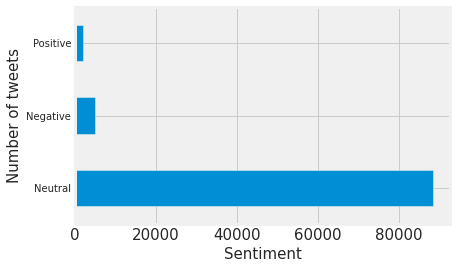

In [ ]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)

tweets_by_sentiment.plot(ax=ax, kind='barh')

In [ ]:
df['total_len'] = df['text'].map(lambda x: len(x))
df['Final_Sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)

In [ ]:
df_merged = df

In [ ]:
sentiment = df_merged.groupby(df['author_id'])['Final_Sentiment'].agg([('neut_count' , lambda x : x[x == 0].sum()), ('neg_count' , lambda x : x[x == 1].sum()) , ('pos_count' , lambda x : x[x == 2].sum())])

In [ ]:
sentiment

,neut_count,neg_count,pos_count
author_id,,,
47613,0.0,0.0,0.0
385493,0.0,0.0,0.0
608583,0.0,0.0,0.0
863971,0.0,0.0,0.0
2283771,0.0,0.0,0.0
...,...,...,...
1524787876835229697,0.0,0.0,0.0
1524796473375858688,0.0,0.0,0.0
1524800429837766656,0.0,0.0,0.0


In [ ]:
df.columns

Index(['author_id', 'author_followers', 'author_followee', 'listed_count',
       'author_tweets', 'text', 'created_at', 'retweets', 'replies', 'likes',
       'quote_count', 'clean tweets', 'clean tweet length', 'pos_count',
       'neg_count', 'neut_count', 'sentiment', 'total_len', 'Final_Sentiment'],
      dtype='object')

**Calculating user attributes**

In [ ]:
df_merged['folws_stat_foloing_rt']=df_merged['author_followers']**2+df_merged['author_followee']-df_merged['author_followee']
df_merged['Reach']=np.log(df_merged['folws_stat_foloing_rt']+1)


df_merged['followee_followers_rt']=df_merged["author_followee"]+1/df_merged["author_followers"]+1
df_merged['sociability']=np.log(df_merged['followee_followers_rt']+1)

In [ ]:
df_merged.head(3)

,author_id,author_followers,author_followee,listed_count,author_tweets,text,created_at,retweets,replies,likes,...,pos_count,neg_count,neut_count,sentiment,total_len,Final_Sentiment,folws_stat_foloing_rt,Reach,followee_followers_rt,sociability
0,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: وسط مطالبات بمحاسبة الاحت...,2022-05-12 23:59:59+00:00,4,0,0,...,1,0,0,Positive,140,0.01,116281,11.663774,790.002933,6.673302
1,1199226055074168833,2262,1362,2,46747,RT @TurkiShalhoub: ماذا لو كانت #شيرين_ابو_عاق...,2022-05-12 23:59:58+00:00,275,0,0,...,0,0,0,Neutral,94,0.00,5116644,15.448010,1363.000442,7.218177
2,1509674687990845440,341,789,0,10146,RT @AhmadAh97666591: دعوات للإضراب الشامل في ا...,2022-05-12 23:59:57+00:00,4,0,0,...,0,0,0,Neutral,140,0.00,116281,11.663774,790.002933,6.673302


In [ ]:
df_merged.created_at  = pd.to_datetime(df_merged.created_at)

In [ ]:
df_merged.created_at = df_merged.created_at.apply(lambda x: x.strftime('%Y-%m-%d'))

In [ ]:
df_merged['created_at'] = pd.to_datetime(df_merged['created_at'], infer_datetime_format=True)

In [ ]:
df_merged['created_at_month'] = df_merged['created_at'].dt.strftime('%Y-%m-%d')

In [ ]:
df_merged['dayOfWeek'] = df_merged['created_at'].dt.day_name()

In [ ]:
df_merged.drop('author_followee', axis=1, inplace=True)
#df_merged.drop('dayOfWeek', axis=1, inplace=True)
df_merged.drop('folws_stat_foloing_rt', axis=1, inplace=True)
df_merged.drop('followee_followers_rt', axis=1, inplace=True)
df_merged.drop('total_len', axis=1, inplace=True)
df_merged.drop('author_tweets', axis=1, inplace=True)
df_merged.drop('replies', axis=1, inplace=True)
df_merged.drop('retweets', axis=1, inplace=True)
df_merged.drop('listed_count', axis=1, inplace=True)
df_merged.drop('author_followers', axis=1, inplace=True)
df_merged.drop('sentiment', axis=1, inplace=True)
df_merged.drop('clean tweet length', axis=1, inplace=True)
df_merged.drop('clean tweets', axis=1, inplace=True)
df_merged.drop('quote_count', axis=1, inplace=True)
df_merged.drop('likes', axis=1, inplace=True)
df_merged.drop('text', axis=1, inplace=True)

In [ ]:
#droppig na if any
df_merged = df_merged.dropna(how = 'any')
df_merged.head(5)
df_merged.fillna(0)
df_merged.fillna(0,inplace=True)
df_merged.fillna(0,inplace=True)
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged.replace(np.nan, 0)

,author_id,created_at,pos_count,neg_count,neut_count,Final_Sentiment,Reach,sociability,created_at_month,dayOfWeek
0,1509674687990845440,2022-05-12,1,0,0,0.01,11.663774,6.673302,2022-05-12,Thursday
1,1199226055074168833,2022-05-12,0,0,0,0.00,15.448010,7.218177,2022-05-12,Thursday
2,1509674687990845440,2022-05-12,0,0,0,0.00,11.663774,6.673302,2022-05-12,Thursday
3,1472639066814521347,2022-05-12,0,0,0,0.00,3.258097,1.435085,2022-05-12,Thursday
4,1509674687990845440,2022-05-12,0,0,0,0.00,11.663774,6.673302,2022-05-12,Thursday
...,...,...,...,...,...,...,...,...,...,...
95416,978721987647324160,2022-05-12,0,0,0,0.00,23.683854,6.364751,2022-05-12,Thursday
95417,4901401397,2022-05-12,0,0,0,0.00,15.899595,7.981050,2022-05-12,Thursday
95418,3111009857,2022-05-12,0,0,0,0.00,13.509210,7.229840,2022-05-12,Thursday
95419,4714131377,2022-05-12,0,0,0,0.00,12.684246,4.709546,2022-05-12,Thursday


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import plotly.figure_factory as ff
import pandas as pd
import plotly
import plotly.graph_objs as go
from plotly.offline import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import parallel_coordinates
from matplotlib.colors import ListedColormap
#from pywaffle import Waffle
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering
import seaborn as sns
from plotly.colors import n_colors
import plotly.express as px
from sklearn import preprocessing
from seaborn import palettes
import seaborn as sb
import pandas as pd
import numpy as np
import tweepy
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from google.colab import drive

In [ ]:
corr_map = df_merged.corr()
corr_map

,author_id,pos_count,neg_count,neut_count,Final_Sentiment,Reach,sociability
author_id,1.000000,0.031528,0.001357,-0.039370,0.015025,-0.331912,-0.189476
pos_count,0.031528,1.000000,0.055701,-0.034570,0.468316,0.023861,0.018330
neg_count,0.001357,0.055701,1.000000,-0.033294,-0.809837,0.025352,0.010463
neut_count,-0.039370,-0.034570,-0.033294,1.000000,0.008394,0.004019,0.002959
Final_Sentiment,0.015025,0.468316,-0.809837,0.008394,1.000000,-0.008871,-0.000618
Reach,-0.331912,0.023861,0.025352,0.004019,-0.008871,1.000000,0.627028
sociability,-0.189476,0.018330,0.010463,0.002959,-0.000618,0.627028,1.000000


In [ ]:
# Displaying the Co-variance between the various attributes/features
df_merged.cov()

,author_id,pos_count,neg_count,neut_count,Final_Sentiment,Reach,sociability
author_id,3.989386e+35,3.345595e+15,2.749985e+14,-6.984289e+15,2.803112e+13,-8.968517e+17,-1.782497e+17
pos_count,3.345595e+15,2.822574e-02,3.003453e-03,-1.631303e-03,2.324029e-04,1.714937e-02,4.596224e-03
neg_count,2.749985e+14,3.003453e-03,1.030067e-01,-3.001308e-03,-7.677334e-04,3.480912e-02,5.012698e-03
neut_count,-6.984289e+15,-1.631303e-03,-3.001308e-03,7.888920e-02,6.964245e-06,4.828995e-03,1.239052e-03
Final_Sentiment,2.803112e+13,2.324029e-04,-7.677334e-04,6.964245e-06,8.724906e-06,-1.120999e-04,-2.726376e-06
Reach,-8.968517e+17,1.714937e-02,3.480912e-02,4.828995e-03,-1.120999e-04,1.830165e+01,3.866628e+00
sociability,-1.782497e+17,4.596224e-03,5.012698e-03,1.239052e-03,-2.726376e-06,3.866628e+00,2.219145e+00


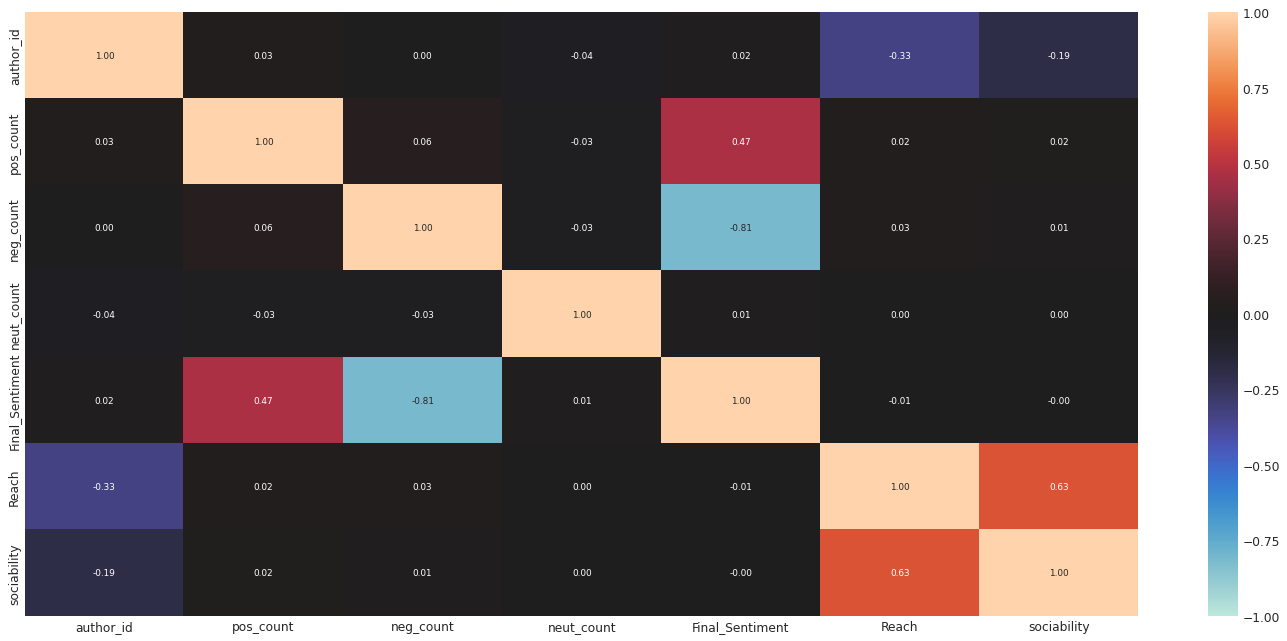

In [ ]:
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(corr_map, vmin=-1, vmax=1, center=0, annot=True, annot_kws={'size':8}, fmt='.2f')

In [ ]:
df_merged

,author_id,created_at,pos_count,neg_count,neut_count,Final_Sentiment,Reach,sociability,created_at_month,dayOfWeek
0,1509674687990845440,2022-05-12,1,0,0,0.01,11.663774,6.673302,2022-05-12,Thursday
1,1199226055074168833,2022-05-12,0,0,0,0.00,15.448010,7.218177,2022-05-12,Thursday
2,1509674687990845440,2022-05-12,0,0,0,0.00,11.663774,6.673302,2022-05-12,Thursday
3,1472639066814521347,2022-05-12,0,0,0,0.00,3.258097,1.435085,2022-05-12,Thursday
4,1509674687990845440,2022-05-12,0,0,0,0.00,11.663774,6.673302,2022-05-12,Thursday
...,...,...,...,...,...,...,...,...,...,...
95416,978721987647324160,2022-05-12,0,0,0,0.00,23.683854,6.364751,2022-05-12,Thursday
95417,4901401397,2022-05-12,0,0,0,0.00,15.899595,7.981050,2022-05-12,Thursday
95418,3111009857,2022-05-12,0,0,0,0.00,13.509210,7.229840,2022-05-12,Thursday
95419,4714131377,2022-05-12,0,0,0,0.00,12.684246,4.709546,2022-05-12,Thursday


In [ ]:
df_merged = df_merged.dropna(how = 'any')
df_merged.fillna(0,inplace=True)

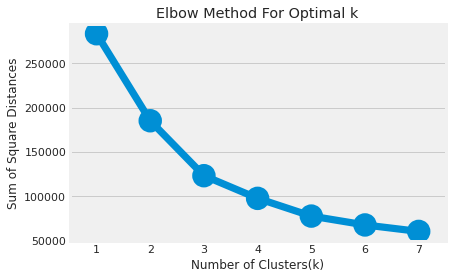

In [ ]:
X_features_rec_mon=df_merged[["Reach", "sociability", "Final_Sentiment"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,8):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 100)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
df2 = df_merged[df_merged.columns.difference(['created_at', 'created_at_month', 'dayOfWeek'])]

In [ ]:
inertia_list = []
for n_clusters in range(1,21):
    model = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 0)
    model.fit(df2)
    inertia_list.append(model.inertia_)

In [ ]:
df2['Final_Sentiment'] = pd.to_numeric(df2['Final_Sentiment'],errors= 'coerce')

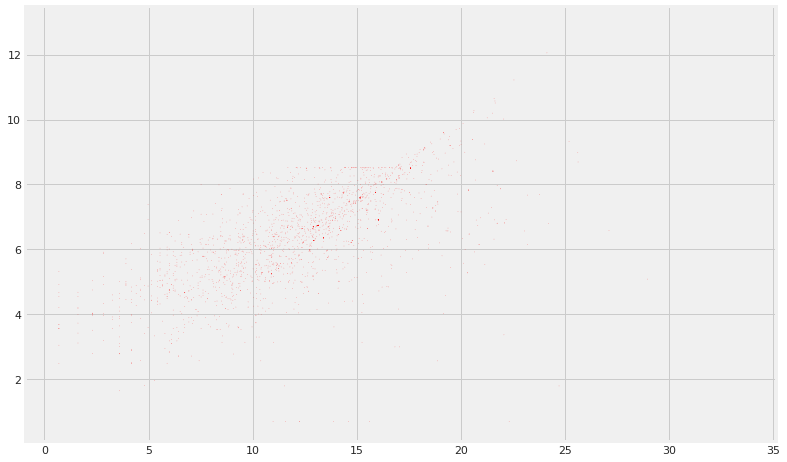

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter( df2.Reach, df2.sociability, df2.Final_Sentiment, color = 'red')

<Figure size 864x576 with 0 Axes>

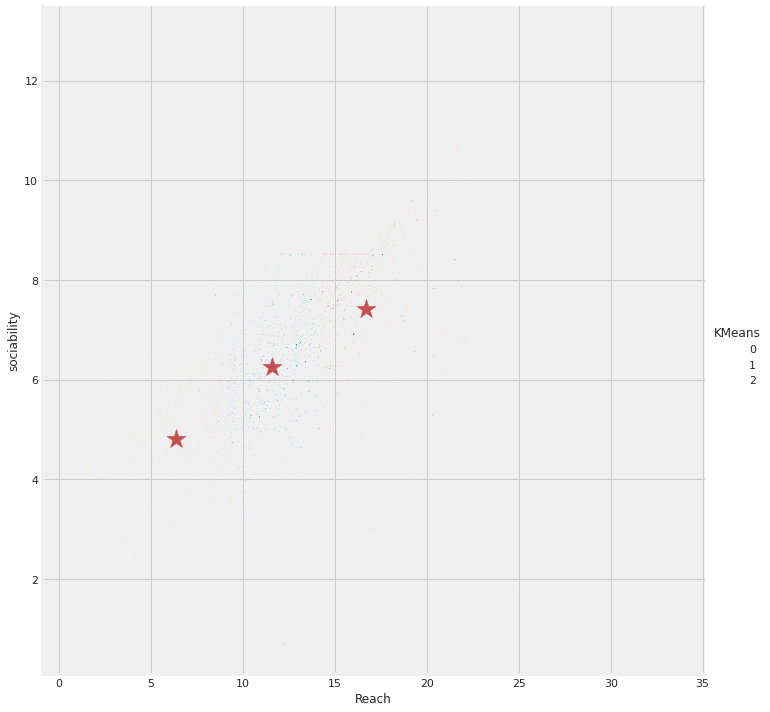

In [ ]:
fig = plt.figure(figsize = (12, 8))
my_data = np.column_stack((df2.Reach, df2.sociability, df2.Final_Sentiment))

km_model = KMeans(n_clusters = 3).fit(my_data)
my_clusters = km_model.cluster_centers_

# Put assigned labels to the original dataset..
df2['KMeans'] = km_model.labels_
p = sns.FacetGrid(data = df2, hue = 'KMeans', height = 10)
p.map(plt.scatter, 'Reach', 'sociability', 'Final_Sentiment')
p.add_legend()
plt.scatter(my_clusters[:, 0], my_clusters[:, 1], s = 400, marker = '*', c = 'r')

In [ ]:
df2['KMeans'] = km_model.labels_
df2.groupby('KMeans').describe()

Final_Sentiment                                                 \
                 count      mean       std   min  25%  50%  75%   max   
KMeans                                                                  
0              46216.0 -0.000393  0.002904 -0.03  0.0  0.0  0.0  0.04   
1              22949.0 -0.000415  0.003279 -0.03  0.0  0.0  0.0  0.02   
2              25264.0 -0.000339  0.002748 -0.03  0.0  0.0  0.0  0.02   

          Reach             ... pos_count      sociability            \
          count       mean  ...       75%  max       count      mean   
KMeans                      ...                                        
0       46216.0  11.597508  ...       0.0  3.0     46216.0  6.256903   
1       22949.0  16.665017  ...       0.0  2.0     22949.0  7.420757   
2       25264.0   6.366649  ...       0.0  3.0     25264.0  4.799567   

                                                                     
             std       min       25%       50%       75%        max  
KMeans                                                               
0       1.116806  0.693368  5.620416  6.300787  6.969793   8.520986  
1       1.279972  0.693151  6.729824  7.586297  8.299286  12.878708  
2       1.101493  0.696287  4.127134  4.844323  5.549128   8.517798  

[3 rows x 56 columns]

In [ ]:
dt_kmeans = df2.copy()
dt_kmeans["author_id"] = df2["author_id"]
#dt_kmeans["Kmeans"] = km_model.labels_
dt_kmeans.head()

,Final_Sentiment,Reach,author_id,neg_count,neut_count,pos_count,sociability,KMeans
0,0.01,11.663774,1509674687990845440,0,0,1,6.673302,0
1,0.00,15.448010,1199226055074168833,0,0,0,7.218177,1
2,0.00,11.663774,1509674687990845440,0,0,0,6.673302,0
3,0.00,3.258097,1472639066814521347,0,0,0,1.435085,2
4,0.00,11.663774,1509674687990845440,0,0,0,6.673302,0


In [ ]:
dt_kmeans = df2.copy()

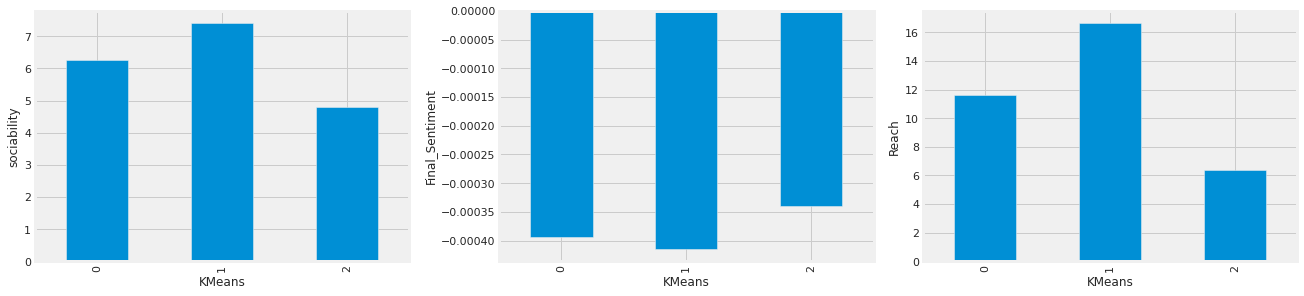

In [ ]:
cols = ["sociability", "Final_Sentiment", "Reach"]

fig, ax = plt.subplots(ncols=3, figsize=(18,4), constrained_layout=True)

dt_kmeans.groupby(['KMeans']).mean()["sociability"].T.plot(kind='bar', ax=ax[0], xlabel="KMeans", ylabel="sociability")
dt_kmeans.groupby(['KMeans']).mean()["Final_Sentiment"].T.plot(kind='bar', ax=ax[1], xlabel="KMeans", ylabel="Final_Sentiment")
dt_kmeans.groupby(['KMeans']).mean()["Reach"].T.plot(kind='bar', ax=ax[2], xlabel="KMeans", ylabel="Reach")
plt.show()

In [ ]:
dt_kmeans["KMeans"] = dt_kmeans["KMeans"].map({0: "users with reach", 1: 'brokers of social movement', 2: 'hostile'})

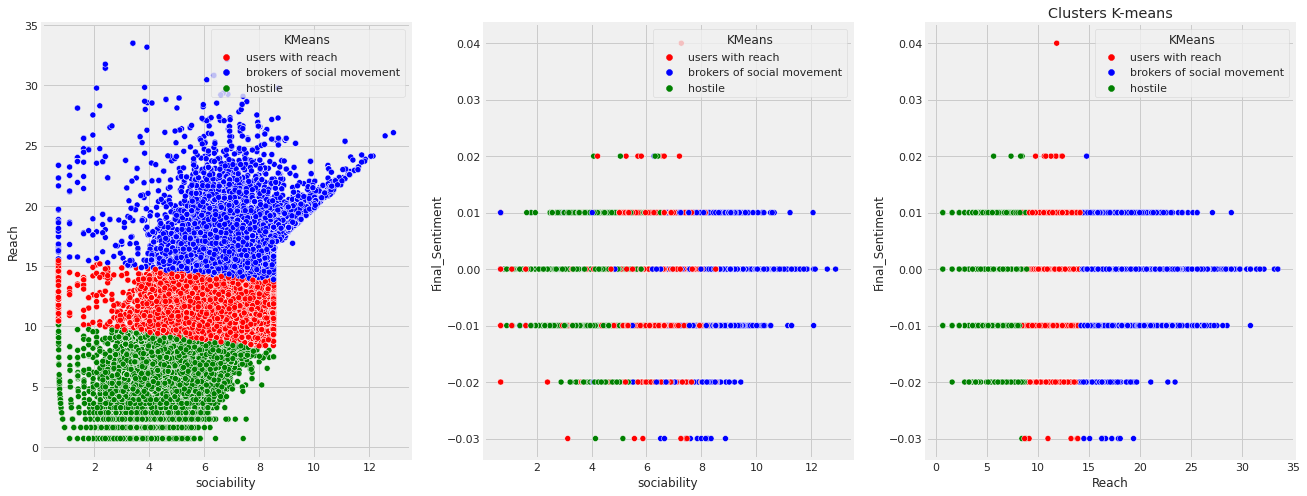

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.scatterplot(data=df_merged, x='sociability', y='Reach', hue=dt_kmeans["KMeans"], ax=ax[0], palette=["red", "blue", "green"])
sns.scatterplot(data=df_merged, x='sociability', y='Final_Sentiment', hue=dt_kmeans["KMeans"], ax=ax[1], palette=["red", "blue", "green"])
sns.scatterplot(data=df_merged, x='Reach', y='Final_Sentiment', hue=dt_kmeans["KMeans"], ax=ax[2], palette=["red", "blue", "green"])
plt.title("Clusters K-means")
plt.show()

In [ ]:
dt_kmeans[dt_kmeans['KMeans']=='users with reach'][['author_id']]

,author_id
0,1509674687990845440
2,1509674687990845440
4,1509674687990845440
5,1303184725595521024
6,1290388013193801736
...,...
95412,3111009857
95415,1082023261905584130
95418,3111009857
95419,4714131377


In [ ]:
dt_kmeans[dt_kmeans['KMeans']=='brokers of social movement'][['author_id']]

,author_id
1,1199226055074168833
16,2192684689
17,1141100927400775680
19,298110296
30,828566897545318400
...,...
95406,806677015684333575
95409,988040724737294342
95413,1306868599
95416,978721987647324160


In [ ]:
dt_kmeans[dt_kmeans['KMeans']=='hostile'][['author_id']]

,author_id
3,1472639066814521347
7,944237963491336192
11,1472639066814521347
14,1472639066814521347
15,1518782060181270528
...,...
95394,1490844105001345024
95405,1035612052734332928
95407,1514777022685319173
95411,1314184665897537536


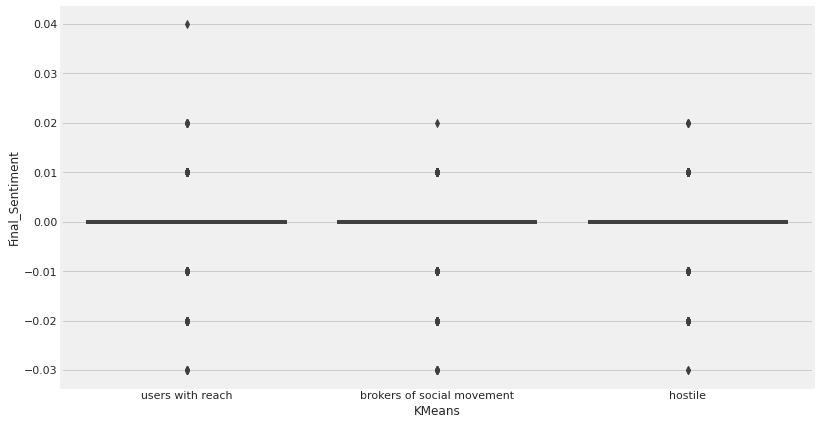

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='KMeans',y='Final_Sentiment', data=dt_kmeans)

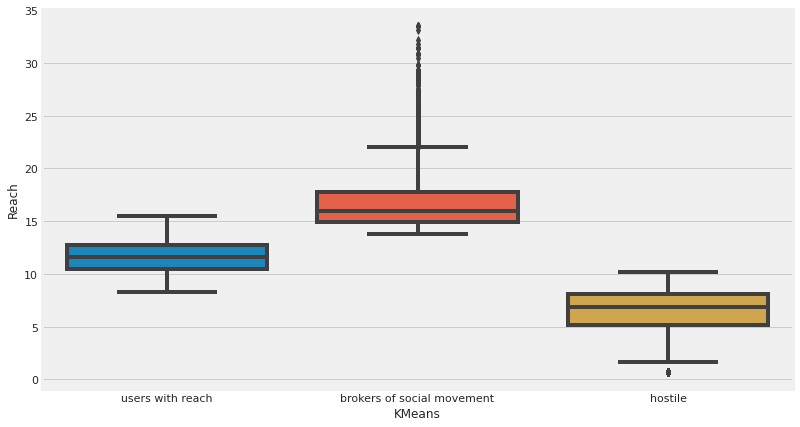

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='KMeans',y='Reach', data=dt_kmeans)

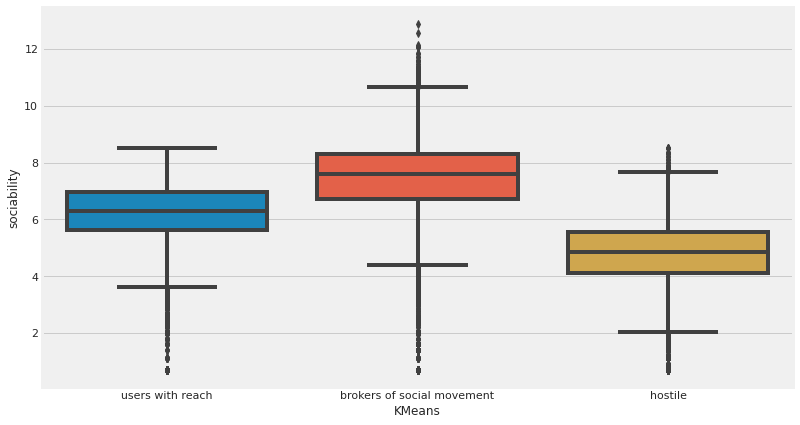

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='KMeans',y='sociability', data=dt_kmeans)

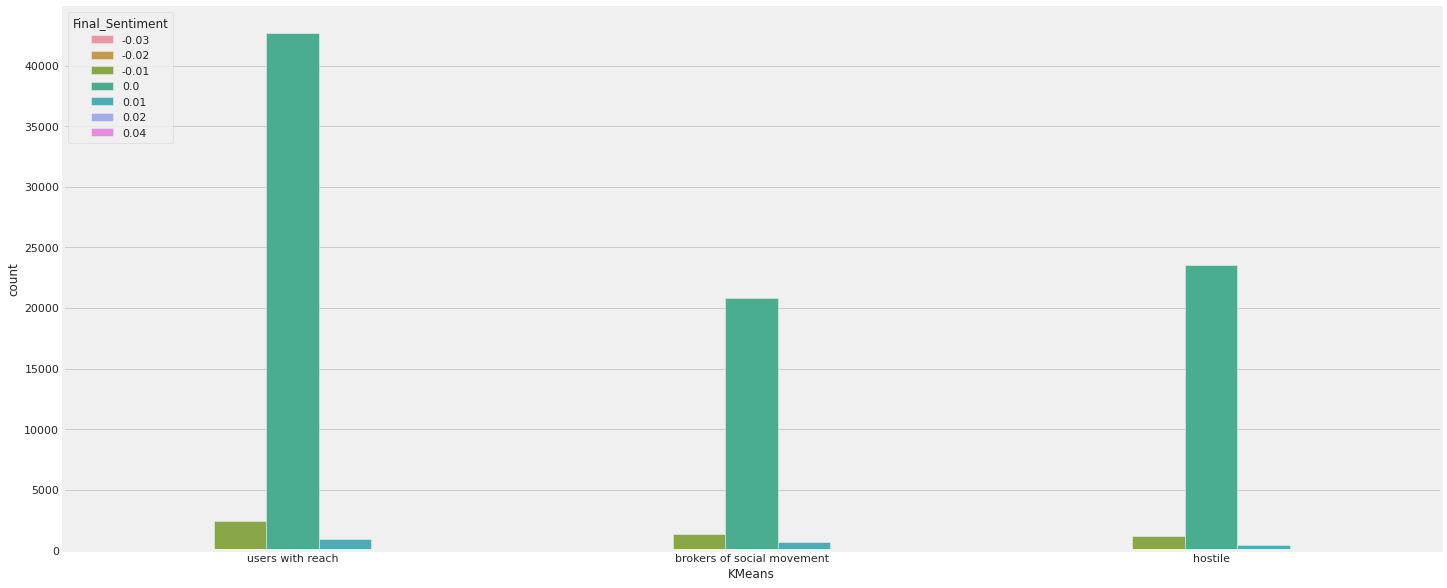

In [ ]:
plt.figure(figsize=(22,10))
sns.countplot(x='KMeans', hue = 'Final_Sentiment',data = dt_kmeans)

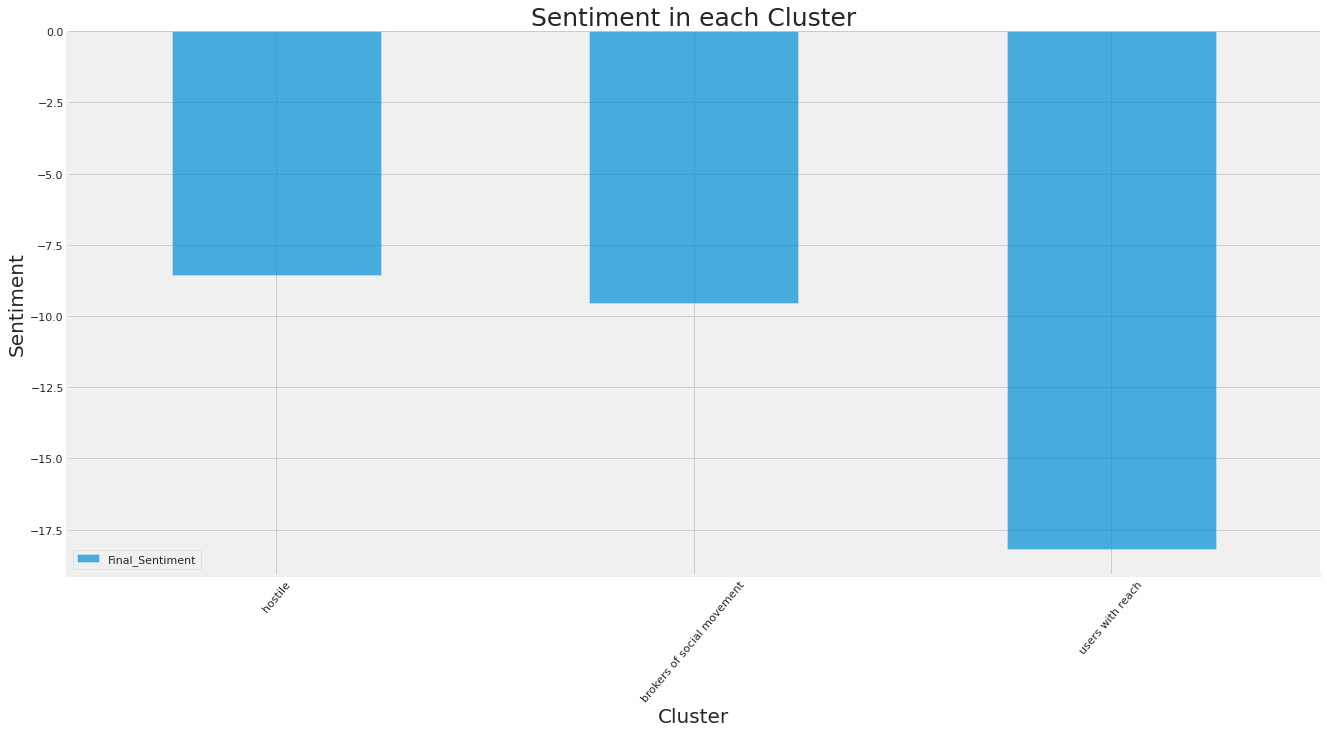

In [ ]:
newdata = dt_kmeans[['Final_Sentiment','KMeans']].groupby(['KMeans']).sum().sort_values('Final_Sentiment',axis = 0,ascending = False)
fig, ax4 = plt.subplots(figsize=(20,10))
newdata.plot(kind = 'bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('Sentiment in each Cluster',fontsize = 25)
plt.xlabel('Cluster',fontsize = 20)
plt.ylabel('Sentiment',fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)


What are the factors associated with the change in user identity and can we predict them?

In [ ]:
data = dt_kmeans

In [ ]:
X = data[['sociability', 'Final_Sentiment', 'Reach']]
y = data['KMeans']

          sociability  Final_Sentiment     Reach
Variance     2.219122         0.000009  17.13563


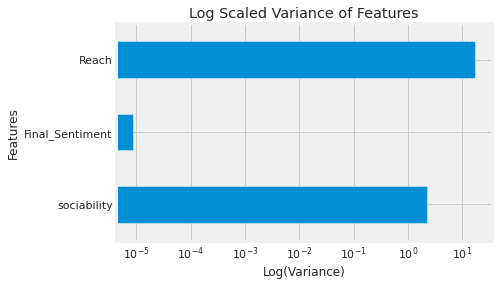

In [ ]:
# feature selection by variance
from sklearn.feature_selection import VarianceThreshold

# default drops features where variance is 0
sel = VarianceThreshold()
sel.fit_transform(X, y)

# features leftover after dropping
selected_features = X[X.columns[sel.get_support(indices=True)]].columns

# variances with features
variances = pd.Series(sel.variances_, X.columns)

df = pd.DataFrame(data=variances).T
df.index = ['Variance']
print(df)

variances.plot(kind='barh')
plt.xscale('log')
plt.xlabel('Log(Variance)')
plt.ylabel('Features')
plt.title('Log Scaled Variance of Features')
plt.show()

                          sociability  Final_Sentiment     Reach
Mutual Information Value     0.901308              0.0  0.986635


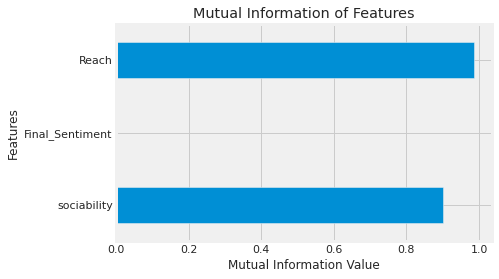

In [ ]:
# information gain by feature:
# can capture any kind of statistical dependency, but being nonparametric,
# they require more samples for accurate estimation
# Higher value means higher dependency
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns)

df = pd.DataFrame(data=feat_importances).T
df.index = ['Mutual Information Value']
print(df)

feat_importances.plot(kind='barh')
plt.xlabel('Mutual Information Value')
plt.ylabel('Features')
plt.title('Mutual Information of Features')
plt.show()

                sociability  Final_Sentiment          Reach
ANOVA F-Value  31375.439427         4.402822  177366.499896
P-value            0.000000         0.012245       0.000000


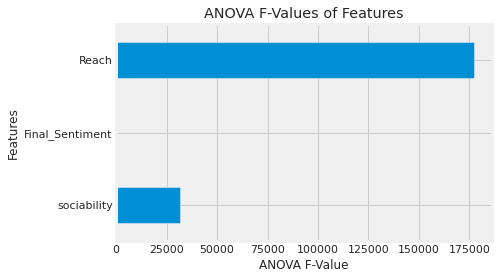

In [ ]:
from sklearn.feature_selection import f_classif

anova = f_classif(X, y)
f_vals = pd.Series(anova[0], X.columns)

df = pd.DataFrame(data = anova, columns = X.columns, index=['ANOVA F-Value', 'P-value'])
print(df)

f_vals.plot(kind='barh')
plt.xlabel('ANOVA F-Value')
plt.ylabel('Features')
plt.title('ANOVA F-Values of Features')
plt.show()

In [ ]:
estimator = SVC(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(X, y)

df = pd.DataFrame(data=[selector.ranking_], columns = X.columns, index=['Ranking'])
df

# 'Device' is most important, followed by 'Segments', then 'Hour' 

,sociability,Final_Sentiment,Reach
Ranking,2,3,1


In [ ]:
# RFE + CV to find optimal features

from sklearn.feature_selection import RFECV

estimator = SVC(kernel="linear")
selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)

df = pd.DataFrame(data=[selector.ranking_], columns = X.columns, index=['Ranking'])
df

# Same results as above.
# We can use RFE with different models as well.

,sociability,Final_Sentiment,Reach
Ranking,1,2,1


Applying Classification/Prediction Models

In [ ]:
dataset = data

In [ ]:
dataset

,Final_Sentiment,Reach,author_id,neg_count,neut_count,pos_count,sociability,KMeans
0,0.01,11.663774,1509674687990845440,0,0,1,6.673302,users with reach
1,0.00,15.448010,1199226055074168833,0,0,0,7.218177,brokers of social movement
2,0.00,11.663774,1509674687990845440,0,0,0,6.673302,users with reach
3,0.00,3.258097,1472639066814521347,0,0,0,1.435085,hostile
4,0.00,11.663774,1509674687990845440,0,0,0,6.673302,users with reach
...,...,...,...,...,...,...,...,...
95416,0.00,23.683854,978721987647324160,0,0,0,6.364751,brokers of social movement
95417,0.00,15.899595,4901401397,0,0,0,7.981050,brokers of social movement
95418,0.00,13.509210,3111009857,0,0,0,7.229840,users with reach
95419,0.00,12.684246,4714131377,0,0,0,4.709546,users with reach
